In [2]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from numpy.linalg import norm
import warnings
import seedbank
import statsmodels.api as sm
warnings.simplefilter('error', UserWarning)
# show the figures in the Jupyter notebook
%matplotlib inline
import sympy as smp



In [3]:
rowdata = loadmat('rowscan.mat', squeeze_me=True)
diag1data = loadmat('diag1scan.mat', squeeze_me=True) #c
diag2data = loadmat('diag2scan.mat', squeeze_me=True) #d

In [4]:
#rowdata
#diag1data
#diag2data

In [5]:
t1=rowdata['rowscan'][:,4]
t2=diag1data['diag1scan'][:,4]
t3=diag2data['diag2scan'][:,4]

In [6]:
t1.T.shape

(16,)

In [7]:
#row scan
w1 = np.zeros((16, 256))
for i in range(16):
    for j in range(16):
        if (i+j*16 <=256):
            w1[i][i+j*16] =1
        else:
            break
                

In [8]:
#diag right to left scan (d) from top to main diagonal
w2 = np.zeros((16, 256))
for i in range(16):
    for j in range(i+1):
        if (i+j*15 <=255):
            w2[i][i+j*15] =np.sqrt(2)
        else:
            break

In [44]:
w1[1][17]

1.0

In [10]:
#diag right to left scan (d) for below the main diagonal
w3 = np.zeros((15, 256))
for i in range(15):
    for j in range(i+1):
        if (255-i*16+j*15 <=255):
            #256-i*16+j*15 real expression but since python uses zero index
            w3[i][255-i*16+j*15] =np.sqrt(2)
        else:
            break

In [11]:
#w3[:15]

w3_new = w3[len(w3)-1::-1]

In [12]:
w3

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.41421356],
       [0.        , 0.        , 0.        , ..., 0.        , 1.41421356,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.41421356, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [43]:
w3_new

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.41421356, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.41421356,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.41421356]])

In [14]:
#start here
#diag scan (c) below main diagonal (from left bottom to main diag-1)
w4 = np.zeros((16, 256))
for i in range(16):
    for j in range(i+1):
        if (15-i+j*17 <=255):
            #16-i+j*17 real expression but since python uses zero index
            w4[i][15-i+j*17] =np.sqrt(2)
        else:
            break

In [15]:
w4[1][31]

1.4142135623730951

In [16]:
#top right to main daig of (c)
w5 = np.zeros((15, 256))
for i in range(15):
    for j in range(i+1):
        if (240-i*16+j*17 <=255):
            #241-i*16+j*17 real expression but since python uses zero index
            w5[i][240-i*16+j*17] =np.sqrt(2)
        else:
            break

In [17]:
w5_new = w5[len(w5)-1::-1]

## merged data to form G

In [42]:
G = np.row_stack((w1, w2, w3_new, w4, w5_new))
smp.Matrix(G)

Matrix([
[            1.0,             0.0,             0.0,             0.0,             0.0,             0.0,             0.0,             0.0,             0.0,             0.0,             0.0,             0.0,             0.0,             0.0,             0.0,             0.0,             1.0,             0.0,             0.0,             0.0,             0.0,             0.0,             0.0,             0.0,             0.0,             0.0,             0.0,             0.0,             0.0,             0.0,             0.0,             0.0,             1.0,             0.0,             0.0,             0.0,             0.0,             0.0,             0.0,             0.0,             0.0,             0.0,             0.0,             0.0,             0.0,             0.0,             0.0,             0.0,             1.0,             0.0,             0.0,             0.0,             0.0,             0.0,             0.0,             0.0,             0.0,             0.0,     

In [19]:
G

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
t= np.concatenate((t1,t3,t2), axis=None)
#np.column_stack((t1,t3,t2))


In [21]:
t.shape

(78,)

In [22]:
u, s, vh = np.linalg.svd(G, full_matrices=True)

In [23]:
np.linalg.matrix_rank(G)

74

In [24]:
s= np.diag(s)
s.shape

(78, 78)

In [25]:
p=np.linalg.matrix_rank(s)

In [26]:
p

74

In [27]:
m, n= G.shape

In [28]:
m,n

(78, 256)

## model null space dimension

In [29]:
n-p

182

## data null space

In [30]:
m-p

4

In [31]:
sp = s[0:p,0:p]
up = u[:,0:p]
vp = vh[:,0:p]
Ginv = vp@np.linalg.inv(sp)@up.T

In [32]:
#model null space
vh[:,0:p].shape

(256, 74)

In [33]:
s[0:p,0:p].shape

(74, 74)

In [34]:
#data null space
u[:,0:p].T.shape

(74, 78)

In [35]:
np.linalg.pinv(G)

array([[ 0.03948709,  0.03558084,  0.03167459, ..., -0.02144045,
        -0.00024406, -0.02420259],
       [-0.01266944,  0.05084429,  0.01815465, ...,  0.00082485,
        -0.0087893 ,  0.02421701],
       [-0.01114861, -0.00659007,  0.05567858, ..., -0.0047604 ,
         0.02011126,  0.01221887],
       ...,
       [-0.01114861, -0.00659007, -0.00235713, ...,  0.00891875,
         0.02011126,  0.01221887],
       [-0.01266944, -0.00748905, -0.00476201, ...,  0.01997565,
         0.01183465,  0.02421701],
       [-0.01910666, -0.01520041, -0.01129416, ...,  0.01446732,
         0.03842584,  0.01722945]])

In [36]:
mdagger = Ginv*t

In [37]:
#sp**(-1)

In [38]:
np.linalg.inv(sp)

array([[0.1290617 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.15003248, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.1767767 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.70710678, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.73669085,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.86553839]])

In [39]:
mdagger.shape

(256, 78)

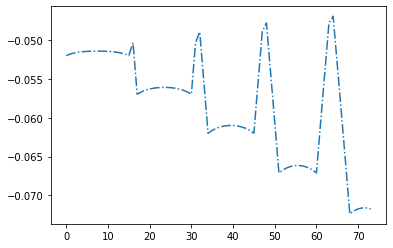

In [41]:
## Plot and interpret atleast one element of each space
plt.plot(vh[:,0:p][0].T,'-.')
plt.show()

## b) i

In [62]:
np.reshape(mdagger,[16,16])

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


ValueError: cannot reshape array of size 19968 into shape (16,16)